# Activity 3

<b> Import pandas and matplotlib.pyplot </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

<b> Load the dataset into a pandas DataFrame from the CSV file </b>

In [2]:
dat = pd.read_csv('austin_weather.csv')
dat.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


<b> We only need the Date and TempAvgF columns; remove all others from the dataset </b>

In [3]:
subset = dat[['Date', 'TempAvgF']]
subset.head()

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50


<b> Create a column in the DataFrame for the year value and extract the year value as an integer from the strings in the Date column and assign these values to the Year column </b>

In [4]:
subset['Year'] = pd.DatetimeIndex(subset.loc[:, 'Date']).year
subset.head()

C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,TempAvgF,Year
0,2013-12-21,60,2013
1,2013-12-22,48,2013
2,2013-12-23,45,2013
3,2013-12-24,46,2013
4,2013-12-25,50,2013


<b> Repeat this process to extract the month values and store the values as integers in the Month column </b>

In [5]:
subset['Month'] = pd.DatetimeIndex(subset.loc[:, 'Date']).month
subset.head()

C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,TempAvgF,Year,Month
0,2013-12-21,60,2013,12
1,2013-12-22,48,2013,12
2,2013-12-23,45,2013,12
3,2013-12-24,46,2013,12
4,2013-12-25,50,2013,12


<b> Repeat this process one more time to store the day values as integers in the Day column </b>

In [6]:
subset['Day'] = pd.DatetimeIndex(subset.loc[:, 'Date']).day
subset.head()

C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,TempAvgF,Year,Month,Day
0,2013-12-21,60,2013,12,21
1,2013-12-22,48,2013,12,22
2,2013-12-23,45,2013,12,23
3,2013-12-24,46,2013,12,24
4,2013-12-25,50,2013,12,25


<b> Compute a 20-day moving average filter </b>

In [7]:
window = 20
subset['MA_20d'] = subset.TempAvgF.rolling(window).mean()
print(subset.head(22))
print(subset.tail())

          Date  TempAvgF  Year  Month  Day  MA_20d
0   2013-12-21        60  2013     12   21     NaN
1   2013-12-22        48  2013     12   22     NaN
2   2013-12-23        45  2013     12   23     NaN
3   2013-12-24        46  2013     12   24     NaN
4   2013-12-25        50  2013     12   25     NaN
5   2013-12-26        48  2013     12   26     NaN
6   2013-12-27        53  2013     12   27     NaN
7   2013-12-28        51  2013     12   28     NaN
8   2013-12-29        50  2013     12   29     NaN
9   2013-12-30        40  2013     12   30     NaN
10  2013-12-31        46  2013     12   31     NaN
11  2014-01-01        54  2014      1    1     NaN
12  2014-01-02        44  2014      1    2     NaN
13  2014-01-03        43  2014      1    3     NaN
14  2014-01-04        57  2014      1    4     NaN
15  2014-01-05        47  2014      1    5     NaN
16  2014-01-06        29  2014      1    6     NaN
17  2014-01-07        35  2014      1    7     NaN
18  2014-01-08        47  2014 

C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<b> Copy the first year's worth of data to a DataFrame </b>

In [8]:
df_one_year = subset.loc[subset.Year == 2015, :].reset_index()
df_one_year['Day_of_Year'] = df_one_year.index + 1
print(df_one_year.head())
print(df_one_year.tail())

   index        Date  TempAvgF  Year  Month  Day  MA_20d  Day_of_Year
0    376  2015-01-01        37  2015      1    1   52.70            1
1    377  2015-01-02        41  2015      1    2   51.50            2
2    378  2015-01-03        51  2015      1    3   50.65            3
3    379  2015-01-04        43  2015      1    4   49.65            4
4    380  2015-01-05        41  2015      1    5   48.95            5
     index        Date  TempAvgF  Year  Month  Day  MA_20d  Day_of_Year
360    736  2015-12-27        55  2015     12   27   61.10          361
361    737  2015-12-28        41  2015     12   28   60.20          362
362    738  2015-12-29        43  2015     12   29   59.25          363
363    739  2015-12-30        49  2015     12   30   58.45          364
364    740  2015-12-31        46  2015     12   31   57.45          365


<b> Plot the raw data and moving average signal, with the x axis being the day number in the year. </b>

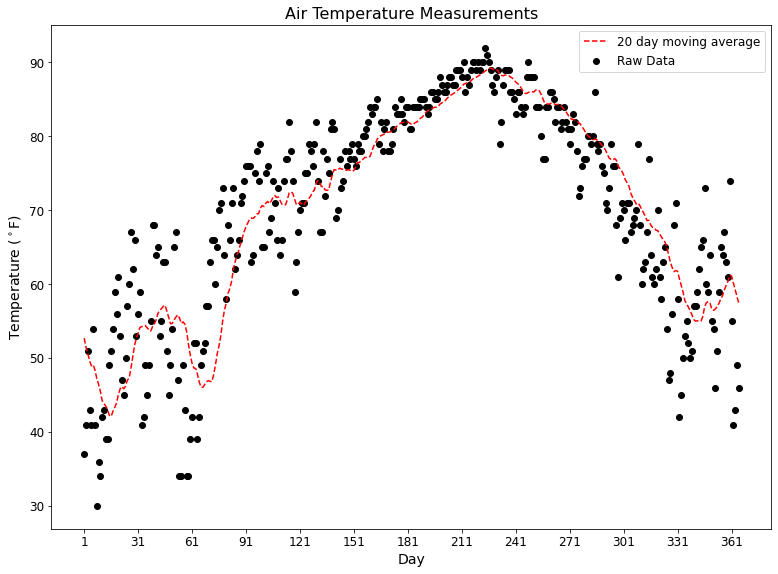

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
ax.scatter(df_one_year.Day_of_Year, 
           df_one_year.TempAvgF, 
           label = 'Raw Data', c = 'k')
# Moving averages
ax.plot(df_one_year.Day_of_Year,
        df_one_year['MA_20d'], 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
             fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
             fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), 
                    df_one_year.Day_of_Year.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

<b> Create a linear regression model using the default parameters, that is, calculate a y intercept for the model and do not normalize the data </b>

In [10]:
# Import the LinearRegression class from the linear_model module of scikit-learn
from sklearn.linear_model import LinearRegression

In [11]:
# Instantiate the LinearRegression class
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_one_year['Day_of_Year'].values.reshape((-1, 1)),
                 df_one_year.TempAvgF)
print('model slope: ', linear_model.coef_)
print('model intercept: ', linear_model.intercept_)
print('model r squared: ', 
      linear_model.score(df_one_year['Day_of_Year'].values.reshape((-1, 1)),
                         df_one_year.TempAvgF))

model slope:  [0.04304568]
model intercept:  62.2349691404486
model r squared:  0.09549593659736455


<b> Generate predictions from the model using the same x data </b>

In [12]:
# generating prediction
y_pred = linear_model.predict(df_one_year['Day_of_Year'].values.reshape((-1, 1)))
x_pred = df_one_year.Day_of_Year

<b> Create a new scatterplot, as before, adding an overlay of the predictions of the model. </b>

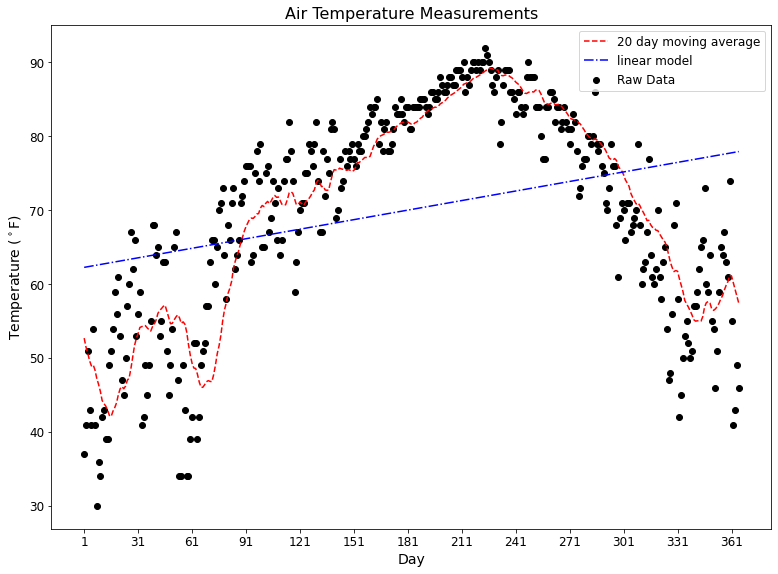

In [13]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
ax.scatter(df_one_year.Day_of_Year, 
           df_one_year.TempAvgF, 
           label = 'Raw Data', c = 'k')
# Moving averages
ax.plot(df_one_year.Day_of_Year,
        df_one_year['MA_20d'], 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
# linear model
ax.plot(x_pred, y_pred,
        c = "blue",
        linestyle = '-.',
        label = 'linear model')
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), 
                    df_one_year.Day_of_Year.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

<b> Now, investigate whether adding the month to the model could improve the model. 

concatenate dummy_vars to the DataFrame in a new DataFrame called df_one_year
</b>

In [14]:
dummy_vars = pd.get_dummies(df_one_year['Month'], drop_first = True)
dummy_vars.columns = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_one_year = pd.concat([df_one_year, dummy_vars], axis = 1).drop('Month', axis = 1)
df_one_year

,index,Date,TempAvgF,Year,Day,MA_20d,Day_of_Year,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,376,2015-01-01,37,2015,1,52.70,1,0,0,0,0,0,0,0,0,0,0,0
1,377,2015-01-02,41,2015,2,51.50,2,0,0,0,0,0,0,0,0,0,0,0
2,378,2015-01-03,51,2015,3,50.65,3,0,0,0,0,0,0,0,0,0,0,0
3,379,2015-01-04,43,2015,4,49.65,4,0,0,0,0,0,0,0,0,0,0,0
4,380,2015-01-05,41,2015,5,48.95,5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,27,61.10,361,0,0,0,0,0,0,0,0,0,0,1
361,737,2015-12-28,41,2015,28,60.20,362,0,0,0,0,0,0,0,0,0,0,1
362,738,2015-12-29,43,2015,29,59.25,363,0,0,0,0,0,0,0,0,0,0,1
363,739,2015-12-30,49,2015,30,58.45,364,0,0,0,0,0,0,0,0,0,0,1


<b> Use a least squares linear regression model and fit the model to the Day_of_Year values and the dummy variables to predict TempAvgF </b>

In [15]:
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(pd.concat([df_one_year.Day_of_Year, df_one_year.loc[:, 'Feb':'Dec']], axis = 1), df_one_year['TempAvgF'])
print('model coefficients: ', linear_model.coef_)
print('model intercept: ', linear_model.intercept_)
print('model r squared: ', linear_model.score(pd.concat([df_one_year.Day_of_Year, df_one_year.loc[:, 'Feb':'Dec']], axis = 1), df_one_year['TempAvgF']))

model coefficients:  [ 0.03719346  1.57445204  9.35397321 19.16903518 22.02065629 26.80023439
 30.17121033 30.82466482 25.6117698  15.71715435  1.542969   -4.06777548]
model intercept:  48.34038858048262
model r squared:  0.7834805472165677


<b> Using the Day_of_Year values and the dummy variables, predict the temperature for the df_one_year data </b>

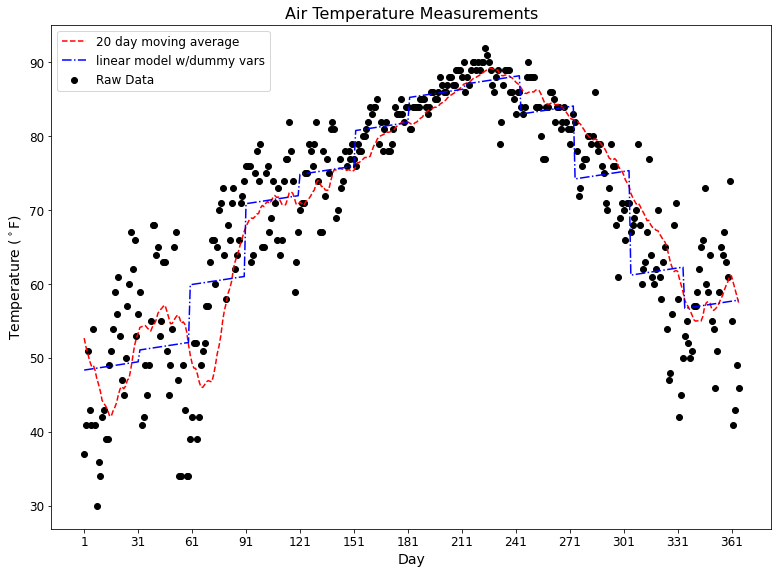

In [16]:
y_pred = linear_model.predict(
    pd.concat([df_one_year.Day_of_Year,
               df_one_year.loc[:, 'Feb':'Dec']],
              axis = 1))
x_pred = df_one_year.Day_of_Year
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
ax.scatter(df_one_year.Day_of_Year, 
           df_one_year.TempAvgF, 
           label = 'Raw Data', c = 'k')
# Moving averages
ax.plot(df_one_year.Day_of_Year,
        df_one_year['MA_20d'], 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
# regression predictions
ax.plot(x_pred, y_pred,
        c = "blue",
        linestyle = '-.',
        label = 'linear model w/dummy vars')
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), 
                    df_one_year.Day_of_Year.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12,
          loc = 'upper left')
plt.show()

<b> Create scaled X and Y data, scaling between 0 and 1 in each case </b>

In [17]:
dat = pd.read_csv('austin_weather.csv')

<b> We only need the Date and TempAvgF columns; remove all others from the dataset </b>

In [18]:
subset = dat[['Date', 'TempAvgF']]

In [19]:
subset['Year'] = pd.DatetimeIndex(subset.loc[:, 'Date']).year
subset['Month'] = pd.DatetimeIndex(subset.loc[:, 'Date']).month
subset['Day'] = pd.DatetimeIndex(subset.loc[:, 'Date']).day

C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [20]:
# Compute a 20-day moving average filter
window = 20
subset['MA_20d'] = subset.TempAvgF.rolling(window).mean()

C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<b> Copy the first year's worth of data to a DataFrame </b>

In [21]:
df_one_year = subset.loc[subset.Year == 2015, :].reset_index()
df_one_year['Day_of_Year'] = df_one_year.index + 1
df_one_year.head()

,index,Date,TempAvgF,Year,Month,Day,MA_20d,Day_of_Year
0,376,2015-01-01,37,2015,1,1,52.70,1
1,377,2015-01-02,41,2015,1,2,51.50,2
2,378,2015-01-03,51,2015,1,3,50.65,3
3,379,2015-01-04,43,2015,1,4,49.65,4
4,380,2015-01-05,41,2015,1,5,48.95,5


<b> Create scaled X and Y data, scaling between 0 and 1 in each case </b>

In [22]:
X_min = df_one_year.Day_of_Year.min()
X_range = df_one_year.Day_of_Year.max() - X_min

Y_min = df_one_year.TempAvgF.min()
Y_range = df_one_year.TempAvgF.max() - Y_min

scale_X = (df_one_year.Day_of_Year - X_min) / X_range

train_X = scale_X.ravel()
train_Y = ((df_one_year.TempAvgF - Y_min) / Y_range).ravel()

<b> Instantiate a model using SGDRegressor </b>

In [23]:
# create the model
np.random.seed(42)
model = SGDRegressor(
    loss = 'squared_loss',
    max_iter = 100,
    learning_rate = 'constant',
    eta0 = 0.0005,
    tol = 0.00009,
    penalty = 'none')

In [24]:
# fit the model
model.fit(train_X.reshape((-1,1)), train_Y)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=100,
             penalty='none', tol=9e-05)

<b> Extract the rescaled model coefficients, Theta0 and Theta1 </b>

In [25]:
Theta0 = (Y_min + Y_range * model.intercept_[0] - Y_range * model.coef_[0] * X_min / X_range)
Theta1 = Y_range * model.coef_[0] / X_range
print(Theta0)
print(Theta1)

61.45512325422412
0.04533603293003107


<b> Generate predictions using the scaled data, use the r2_score method </b>

In [26]:
pred_X = df_one_year['Day_of_Year']
pred_Y = model.predict(train_X.reshape((-1, 1)))

In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(train_Y, pred_Y)
print('r quared = ', r2)

r quared =  0.09462157379706759


<b> Rescale the predictions </b>

In [28]:
pred_Y = (pred_Y * Y_range) + Y_min

<b> Create a visualization with the raw data, the 20-day moving averages, and the new linear fit line. Include the model equation on the chart. </b>

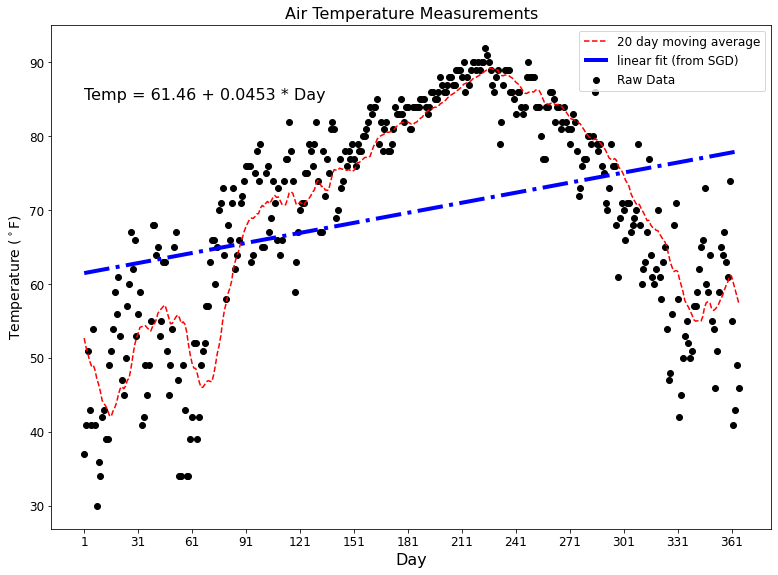

In [29]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_axes([1, 1, 1, 1])
# Raw data
ax.scatter(df_one_year.Day_of_Year, 
           df_one_year.TempAvgF, 
           label = 'Raw Data', c = 'k')
# Moving averages
ax.plot(df_one_year.Day_of_Year,
        df_one_year['MA_20d'], 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
# Regression predictions
ax.plot(pred_X, pred_Y,
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit (from SGD)')
# put the model on the plot
ax.text(1, 85,
        'Temp = ' + str(round(Theta0, 2)) + ' + ' + str(round(Theta1, 4)) + ' * Day',
        fontsize = 16)#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 16)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), 
                    df_one_year.Day_of_Year.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()